In [1]:
import pandas as pd 
import numpy as np 
import nltk
df = pd.read_csv(r'D:\Study Materials\[Coding Ninjas] Machine Learning and Data Science\[Coding Ninjas] Machine Learning and Data Science\43.Project Twitter US Airline Sentiment Analysis (no vdos)\training_twitter_x_y_train.csv')

In [2]:
df.loc[df['airline_sentiment'] == 'negative','airline_sentiment'] = int(0)
df.loc[df['airline_sentiment'] == 'positive','airline_sentiment'] = int(1)
df.loc[df['airline_sentiment'] == 'neutral','airline_sentiment'] = int(2)
df

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567900433542488064,0,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2015-02-17 20:16:29 -0800,Washington D.C.,Atlantic Time (Canada)
1,569989168903819264,1,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2015-02-23 14:36:22 -0800,"Indianapolis, Indiana; USA",Central Time (US & Canada)
2,568089179520954368,1,United,NaN,LocalKyle,NaN,0,@united Flew ORD to Miami and back and had gr...,NaN,2015-02-18 08:46:29 -0800,Illinois,Central Time (US & Canada)
3,568928195581513728,0,Southwest,NaN,amccarthy19,NaN,0,@SouthwestAir @dultch97 that's horse radish 😤🐴,NaN,2015-02-20 16:20:26 -0800,NaN,Atlantic Time (Canada)
4,568594180014014464,0,United,NaN,J_Okayy,NaN,0,@united so our flight into ORD was delayed bec...,NaN,2015-02-19 18:13:11 -0800,NaN,Eastern Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...
10975,569934458364813313,2,American,NaN,Cottopanama85,NaN,0,@AmericanAir followback,NaN,2015-02-23 10:58:58 -0800,"ohio,panama",NaN
10976,568564006329434113,1,United,NaN,PaulBEsteves,NaN,0,@united thanks for the help. Wish the phone re...,NaN,2015-02-19 16:13:17 -0800,Brooklyn,Eastern Time (US & Canada)
10977,569643648910028801,0,US Airways,NaN,runfixsteve,NaN,0,@usairways the. Worst. Ever. #dca #customerser...,NaN,2015-02-22 15:43:24 -0800,"St. Augustine, Florida",NaN
10978,568864981917110272,0,US Airways,NaN,CLChicosky,NaN,0,@nrhodes85: look! Another apology. DO NOT FLY ...,NaN,2015-02-20 12:09:15 -0800,NaN,NaN


In [3]:
df = df[['text','airline_sentiment']]
data = df.to_numpy()
data

array([['@SouthwestAir I am scheduled for the morning, 2 days after the fact, yes..not sure why my evening flight was the only one Cancelled Flightled',
        0],
       ['@SouthwestAir seeing your workers time in and time out going above and beyond is why I love flying with you guys. Thank you!',
        1],
       ['@united Flew ORD to Miami and back and  had great crew, service on both legs. THANKS',
        1],
       ...,
       ['@usairways the. Worst. Ever. #dca #customerservice', 0],
       ['@nrhodes85: look! Another apology. DO NOT FLY @USAirways', 0],
       ['@united you are by far the worst airline. 4 plane delays on 1 round trip flight. How is that possible.',
        0]], dtype=object)

In [4]:
x = data[:,0]
y = data[:,1]

In [5]:
from nltk.corpus import stopwords
import re
stops = stopwords.words('english')

In [6]:
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
def get_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [7]:
dict = {}
for i in range(len(x)):
    txt = x[i].lower()
    sen = re.split(r'\W+',txt)
    for w in sen:
        if not(w.isalpha()) or (len(w)<=1):
            continue
        pos = pos_tag([w])
        main_word = lem.lemmatize(w,get_pos(pos[0][1]))
        if main_word in dict:
            dict[main_word]+=1
        else:
            dict[main_word]=1
dict

{'southwestair': 1844,
 'be': 6357,
 'schedule': 72,
 'for': 3016,
 'the': 4497,
 'morning': 127,
 'day': 414,
 'after': 352,
 'fact': 24,
 'yes': 186,
 'not': 1189,
 'sure': 131,
 'why': 445,
 'my': 2458,
 'even': 238,
 'flight': 3619,
 'only': 261,
 'one': 447,
 'cancel': 803,
 'flightled': 380,
 'see': 238,
 'your': 1289,
 'worker': 10,
 'time': 715,
 'in': 1903,
 'and': 2763,
 'out': 529,
 'go': 558,
 'above': 11,
 'beyond': 30,
 'love': 210,
 'fly': 528,
 'with': 1148,
 'you': 3332,
 'guy': 310,
 'thank': 479,
 'united': 3185,
 'flew': 35,
 'ord': 90,
 'to': 6478,
 'miami': 39,
 'back': 407,
 'have': 2073,
 'great': 257,
 'crew': 176,
 'service': 752,
 'on': 2850,
 'both': 53,
 'leg': 38,
 'thanks': 833,
 'that': 1285,
 'horse': 2,
 'radish': 1,
 'so': 698,
 'our': 508,
 'into': 124,
 'delayed': 396,
 'because': 234,
 'of': 1587,
 'air': 104,
 'force': 31,
 'but': 953,
 'last': 220,
 'sbn': 1,
 'at': 1114,
 'min': 241,
 'from': 905,
 'now': 779,
 'we': 975,
 'just': 741,
 'land': 

In [8]:
dct2 = {i:j for i,j in sorted(dict.items(), key = lambda item:item[1], reverse = True )}
dct2

{'to': 6478,
 'be': 6357,
 'the': 4497,
 'flight': 3619,
 'you': 3332,
 'united': 3185,
 'for': 3016,
 'on': 2850,
 'and': 2763,
 'my': 2458,
 'usairways': 2256,
 'americanair': 2236,
 'have': 2073,
 'in': 1903,
 'it': 1898,
 'southwestair': 1844,
 'jetblue': 1764,
 'of': 1587,
 'get': 1569,
 'me': 1458,
 'your': 1289,
 'that': 1285,
 'can': 1268,
 'do': 1250,
 'not': 1189,
 'with': 1148,
 'no': 1139,
 'at': 1114,
 'this': 1031,
 'we': 975,
 'but': 953,
 'co': 910,
 'http': 906,
 'from': 905,
 'hour': 884,
 'thanks': 833,
 'cancel': 803,
 'now': 779,
 'service': 752,
 'just': 741,
 'help': 736,
 'an': 722,
 'time': 715,
 'customer': 710,
 'so': 698,
 'what': 618,
 'call': 605,
 'they': 582,
 'bag': 576,
 'wait': 565,
 'go': 558,
 'up': 558,
 'will': 553,
 'plane': 548,
 'out': 529,
 'make': 529,
 'fly': 528,
 'need': 514,
 'amp': 511,
 'hold': 511,
 'our': 508,
 'how': 499,
 'there': 499,
 'u': 495,
 'when': 491,
 'all': 491,
 'thank': 479,
 'if': 477,
 'still': 448,
 'one': 447,
 'why

[6478 6357 4497 ...    1    1    1]
8543


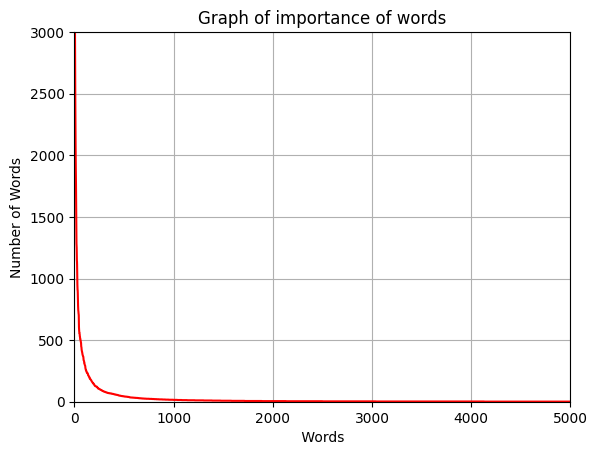

In [9]:
import matplotlib.pyplot as plt
num_of_words = np.array(list(dct2.values()))
print(num_of_words)
words = np.arange(0,len(num_of_words),1)
print(len(words))
plt.plot(words,num_of_words,color = 'red')
plt.grid(True)
plt.xlabel(" Words ",color = 'black')
plt.ylabel("Number of Words",color = 'black')
plt.axis([0,5000,0,3000])
plt.title("Graph of importance of words")
plt.show()

In [10]:
seq_dct = {'NaN':8000}
temp = 0
for i in dct2.keys():
    seq_dct[i] = temp
    temp += 1
    if temp == 8000:
        break
seq_dct

{'NaN': 8000,
 'to': 0,
 'be': 1,
 'the': 2,
 'flight': 3,
 'you': 4,
 'united': 5,
 'for': 6,
 'on': 7,
 'and': 8,
 'my': 9,
 'usairways': 10,
 'americanair': 11,
 'have': 12,
 'in': 13,
 'it': 14,
 'southwestair': 15,
 'jetblue': 16,
 'of': 17,
 'get': 18,
 'me': 19,
 'your': 20,
 'that': 21,
 'can': 22,
 'do': 23,
 'not': 24,
 'with': 25,
 'no': 26,
 'at': 27,
 'this': 28,
 'we': 29,
 'but': 30,
 'co': 31,
 'http': 32,
 'from': 33,
 'hour': 34,
 'thanks': 35,
 'cancel': 36,
 'now': 37,
 'service': 38,
 'just': 39,
 'help': 40,
 'an': 41,
 'time': 42,
 'customer': 43,
 'so': 44,
 'what': 45,
 'call': 46,
 'they': 47,
 'bag': 48,
 'wait': 49,
 'go': 50,
 'up': 51,
 'will': 52,
 'plane': 53,
 'out': 54,
 'make': 55,
 'fly': 56,
 'need': 57,
 'amp': 58,
 'hold': 59,
 'our': 60,
 'how': 61,
 'there': 62,
 'u': 63,
 'when': 64,
 'all': 65,
 'thank': 66,
 'if': 67,
 'still': 68,
 'one': 69,
 'why': 70,
 'try': 71,
 'would': 72,
 'airline': 73,
 'gate': 74,
 'day': 75,
 'please': 76,
 'back

In [11]:
x

array(['@SouthwestAir I am scheduled for the morning, 2 days after the fact, yes..not sure why my evening flight was the only one Cancelled Flightled',
       '@SouthwestAir seeing your workers time in and time out going above and beyond is why I love flying with you guys. Thank you!',
       '@united Flew ORD to Miami and back and  had great crew, service on both legs. THANKS',
       ..., '@usairways the. Worst. Ever. #dca #customerservice',
       '@nrhodes85: look! Another apology. DO NOT FLY @USAirways',
       '@united you are by far the worst airline. 4 plane delays on 1 round trip flight. How is that possible.'],
      dtype=object)

In [12]:
def padding(x_temp,pad_size):
    if len(x_temp) >= pad_size:
        return x_temp[:pad_size]
    else:
        for i in range(pad_size-len(x_temp)):
            x_temp.append(8000)
        return x_temp

In [13]:
# defining a function to make a data set
def make_dataset(x,seq_dct,pad_size):
    x_train_test = []
    for i in range(len(x)):
        txt = x[i].lower()
        sen = re.split(r'\W+',txt)
        x_temp = []
        for w in sen:
            if w in seq_dct:
                x_temp.append(seq_dct[w])
        x_seq = padding(x_temp,pad_size)
        x_train_test.append(x_seq)
    return x_train_test
            
x_new = make_dataset(x,seq_dct,50)
x_new = np.array(x_new)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y)

In [15]:
import tensorflow as tf 
tf.compat.v1.disable_eager_execution()
y_train2 = tf.keras.utils.to_categorical(y_train,3)
y_test2 = tf.keras.utils.to_categorical(y_test,3)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
model = Sequential()
model.add(Embedding(input_dim=8001, output_dim=50, input_length=50))
model.add(Dropout(0.2))
model.add(LSTM(units=500,return_sequences=True))
model.add(LSTM(units=250))
model.add(Dropout(0.15))
model.add(Dense(units=500,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(units=250,activation='tanh'))
# model.add(Dropout(0.1))
model.add(Dense(units=3,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            400050    
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm (LSTM)                 (None, 50, 500)           1102000   
                                                                 
 lstm_1 (LSTM)               (None, 250)               751000    
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense (Dense)               (None, 500)               125500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0

In [17]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
x_train.shape , x_test.shape

((8235, 50), (2745, 50))

In [20]:
model.fit(x_train,y_train2,epochs=10,batch_size=300)

Train on 8235 samples
Epoch 1/10
8235/8235 [==============================] - 5s 570us/sample - loss: 0.5488 - accuracy: 0.7535
Epoch 2/10
8235/8235 [==============================] - 5s 580us/sample - loss: 0.5490 - accuracy: 0.7494
Epoch 3/10
8235/8235 [==============================] - 5s 589us/sample - loss: 0.5255 - accuracy: 0.7569
Epoch 4/10
8235/8235 [==============================] - 5s 589us/sample - loss: 0.4353 - accuracy: 0.8033
Epoch 5/10
8235/8235 [==============================] - 5s 595us/sample - loss: 0.3450 - accuracy: 0.8346
Epoch 6/10
8235/8235 [==============================] - 5s 563us/sample - loss: 0.2946 - accuracy: 0.8614
Epoch 7/10
8235/8235 [==============================] - 5s 616us/sample - loss: 0.2796 - accuracy: 0.8759
Epoch 8/10
8235/8235 [==============================] - 5s 576us/sample - loss: 0.2521 - accuracy: 0.8948
Epoch 9/10
8235/8235 [==============================] - 5s 621us/sample - loss: 0.2305 - accuracy: 0.9113
Epoch 10/10
8235/8235 [=

In [21]:
result = model.evaluate(x_train,y_train2)
result

c:\Users\rohit\anaconda3\envs\py310\lib\site-packages\keras\engine\training_v1.py:2332: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


[0.21651452304235572, 0.9088846]

In [22]:
result = model.evaluate(x_test,y_test2)
result

[0.4337291280319999, 0.8234365]